In [1]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# funtion for outliers
def handle_outliers(feature):
  data_sorted = df.sort_values(by = feature)
  Q1 = data_sorted[feature].quantile(0.25)
  Q3 = data_sorted[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  data_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  return data_filtered

In [4]:
# Importing dataset
df = pd.read_csv("HousingData.csv")

# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Handling outliers
for i in df:
  df = handle_outliers(i)

# Data Normalization
standard_scaler = StandardScaler()
standardized_features = standard_scaler.fit_transform(df)
df = pd.DataFrame(standardized_features, columns = df.columns)

In [6]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

mse = mean_squared_error(y_test, y_predict)

print("Mean Squared Error: ", mse)

Mean Squared Error:  0.48061541729875984


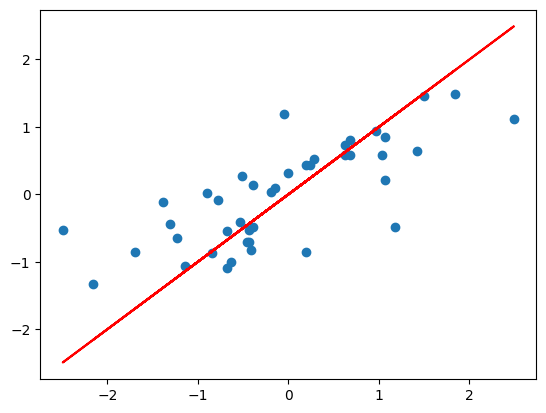

In [7]:
# plotting

plt.scatter(x = y_test, y = y_predict)
plt.plot(y_test, y_test, color = 'red')